In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def NACA4(s):

    #definition of the NACA profile as XXXX
    NACA = s
    c = 1 #chord line

    #NACA XXXX = m p (pt)
    m = int(int(NACA)/1e3)/1e2 #maximum camber
    p = int((int(NACA)-m*1e5)/1e2)/1e1 #location of maximum camber
    pt = int((int(NACA)-m*1e5-p*1e3)) #percentage of thickness with respect to the chord


    #mean camber line definition
    if p != 0:
        x = np.append(np.linspace(0,p/100*c,126)[:-1],np.linspace(p/100*c,c,75))
        x_pc = x<(p*c) #masked array to create the piece-wise function

        yc1 = ((c*m)/(p**2))*(2*p*(x/c)-(x/c)**2)
        yc2 = ((c*m)/((1-p)**2))*((1-2*p)+2*p*(x/c)-(x/c)**2)

        yc = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                yc[i] = yc1[i]
            else:
                yc[i] = yc2[i]

        #mean camber line derivative
        dyc1dx = (2*m)/(p**2)*(p-(x/c))
        dyc2dx = (2*m)/((1-p)**2)*(p-(x/c))

        dycdx = np.zeros(np.shape(x))

        for i in range(np.shape(x)[0]):
            if x_pc[i] == True:
                dycdx[i] = dyc1dx[i]
            else:
                dycdx[i] = dyc2dx[i]

        theta = np.arctan(dycdx)

        plt.plot(x,yc1,'--k',label='yc1')
        plt.plot(x,yc2,'-.k',label='yc2')
        plt.plot(x,0.01*x_pc,':',color='grey', label='Masked matrix')
        plt.plot(x,yc,label='Mean camber')
        plt.legend()
    else:
        #symmetric airfoil camber line
        x = np.linspace(0,c,200)
        yc = np.zeros(np.shape(x))

        plt.plot(x,yc,label='Mean camber')
        plt.legend()


    #thickness
    if p != 0:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)
        xu = x - yt*np.sin(theta)
        xl = x + yt*np.sin(theta)
        yu = yc + yt*np.cos(theta)
        yl = yc - yt*np.cos(theta)


        fig, ax = plt.subplots()

        ax.set_xlim(-c*0.1,1.1*c)
        ax.axis('equal')
        ax.axis('off')
        ax.plot(xu,yu,'b')
        ax.plot(xl,yl,'b')
        ax.fill_between(x, yu, yl,facecolor='blue',alpha=0.1)
        ax.plot(x,yc,'r',linewidth=0.7)
        ax.plot([0,c],[0,0],'g',linewidth=0.6)

    else:
        yt = 5*pt/100*(0.2969*np.sqrt(x/c)-0.1260*(x/c)-0.3516*(x/c)**2+0.2843*(x/c)**3-0.1036*(x/c)**4)

        fig, ax = plt.subplots()

        ax.set_xlim(-c*0.1,1.1*c)
        ax.axis('equal')
        ax.axis('off')
        ax.plot(x,yt,'b')
        ax.plot(x,-yt,'b')
        ax.fill_between(x, -yt, yt,facecolor='blue',alpha=0.1)
        ax.plot(x,yc,'r',linewidth=0.7)
        ax.plot([0,c],[0,0],'g',linewidth=0.6)

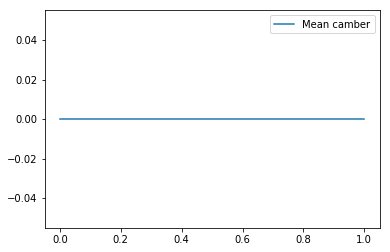

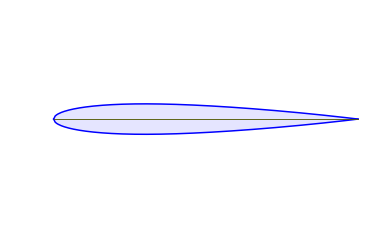

In [3]:
NACA4('0010')

## Stuff for mesh generation

Equations for simple grading are:

$$
\begin{Bmatrix}
\delta_1 = k \delta_0 && \delta_2= k\delta_1 = k^2 \delta_0 && \delta_{N-1}=k^{N-1}\delta_0 \\
&& \varepsilon = \dfrac{\delta_e}{\delta_s} = \dfrac{\delta_{N-1}}{\delta_0} && \delta_{N-1}=\varepsilon\delta_0
\end{Bmatrix} \longrightarrow {\varepsilon = k^{N-1}}
$$


$$
L= \sum\limits^{N-1}_{i=0} \delta_i = \delta_0 + \delta_1 + \delta_2 + \delta_3 + ... + \delta_{N-1} = k^0\delta_0 + k^1\delta_0 + k^2\delta_0 + k^3\delta_0 + ... + k^{N-1}\delta_0 = \delta_0 \sum\limits^{N-1}_{i=0} k^{i} \longrightarrow \delta_0 = \dfrac{L}{\sum\limits^{N-1}_{i=0} k^i} 
$$

<img src="simpleGrading.svg" alt="simple-grading pic should be here" style="width: 500px;"/>

In [39]:
def simple_grading(N, expRatio, L):
    delta = np.zeros(N) #size of each cell array
    nodes = np.zeros(N+1) #position of the nodes

    kVal = expRatio**((1)/(N-1)) 
    k = np.zeros(N) #increment of each cell

    for i in range(N):
        k[i] = kVal**(i) 

    deltaS = L/np.sum(k)  #first cell size 

    delta = deltaS*k #size of each cell
    
    for i in range(N):
        nodes[i+1] = nodes[i] + delta[i]
        
    return nodes, delta

In [63]:
def grading_plot(x): #nodes should be imported

    y = 0.5*np.ones(np.shape(x)[0])
    
    fig, ax = plt.subplots()
        
    ax.set_xlim(-x[1]*0.5,1.1*x[-1])
    ax.set_ylim(0,1)
    ax.axis('off')
    ax.plot([x[0],x[-1]],[y[0],y[-1]],'k')
    ax.scatter(x,y,c='k')

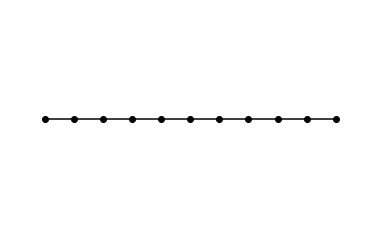

In [68]:
nodes, delta = simple_grading(10, 1, 1)
grading_plot(nodes)